<a href="https://colab.research.google.com/github/JM3309/Projects/blob/master/IBM_Attrition_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is a IBM employees' data set created by IBM data scientist
This project include 2 parts.

The first part will prepocessing the data and attempt to identify trends and patterns.I'll do some visualization and EDA analysis to uncover the factors that lead to employee attrition.(part2 & part3)


The second part is using several machine learning techniques to identify the individuals that are more likely to leave the organization.(part4)

### model: 

* Logistic Regression

* KNN

* Random Forest

* GBM


### data source: 
*https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset*





# 1.IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/ml_projects/business_6_case"

 datasets_HR-Employee-Attrition.csv  'task write up.gdoc'


In [4]:
# import datasets
employee_df = pd.read_csv('/content/drive/My Drive/ml_projects/business_6_case/datasets_HR-Employee-Attrition.csv')

In [5]:
# basic information for the data
print(employee_df.shape)

(1470, 35)


In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 2.CREATE TESTING AND TRAINING DATASET & PREPOCCESSING DATA



prepoccess data

convert category data to numbers

In [9]:
# change the "Attrition" from Yes/No to 1/0
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)

# change the "Over18" from Y/N to 1/0
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x =="Y" else 0)

# change the "OverTime" from Yes/No to 1/0
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x =="Yes" else 0)


In [10]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


check missing data



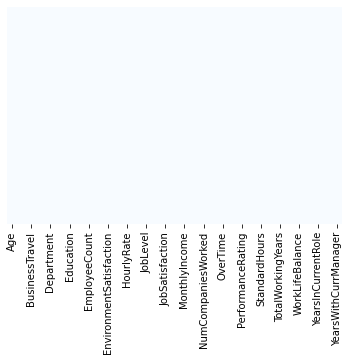

In [11]:
sns.heatmap(employee_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
#no missing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5267fe5978>,
      dtype=object)

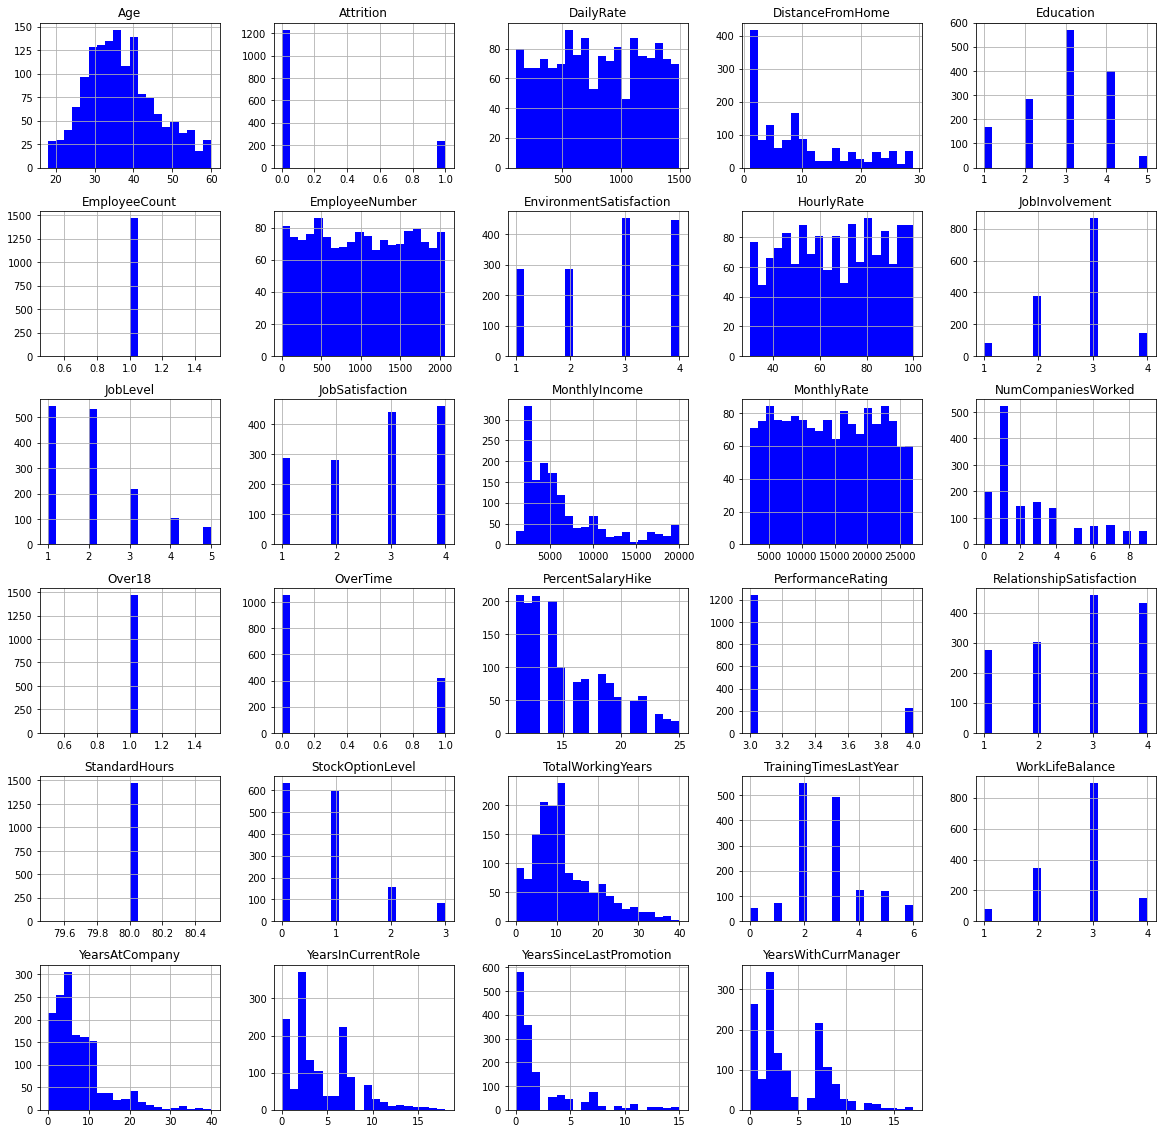

In [12]:
employee_df.hist(bins=20,figsize=(20,20),color='blue')

It make sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other.

drop 4 useless columns

In [13]:
#from the hist figure above we need to drop 4 columns
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],
                 axis=1,inplace=True)
employee_df.shape

(1470, 31)

In [14]:
 x_cat = employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

In [15]:
x_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()
x_cat = pd.DataFrame(x_cat)

In [18]:
x_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


drop the target attrition

In [19]:
x_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction',
              'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	
              'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',
              'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	,
              'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [20]:
x_all = pd.concat([x_cat,x_numerical],axis=1)

# 3.VISUALIZE DATASET AND EXPLORATORY DATA ANALYSIS(EDA)

In [21]:
left_df = employee_df[employee_df['Attrition']==1]
stayed_df = employee_df[employee_df['Attrition']==0]

In [22]:
print("Total=",len(employee_df))
print("The num of employees who left is ", len(left_df))
print("% of employees who left =",len(left_df)/len(employee_df)*100,"%")

print("The num of employees who stayed is ", len(stayed_df))
print("% of employees who stayed =",len(stayed_df)/len(employee_df)*100,"%")

Total= 1470
The num of employees who left is  237
% of employees who left = 16.122448979591837 %
The num of employees who stayed is  1233
% of employees who stayed = 83.87755102040816 %


This is an imbalanced data and the proportion is around 1:5.

Calculate the correlation 

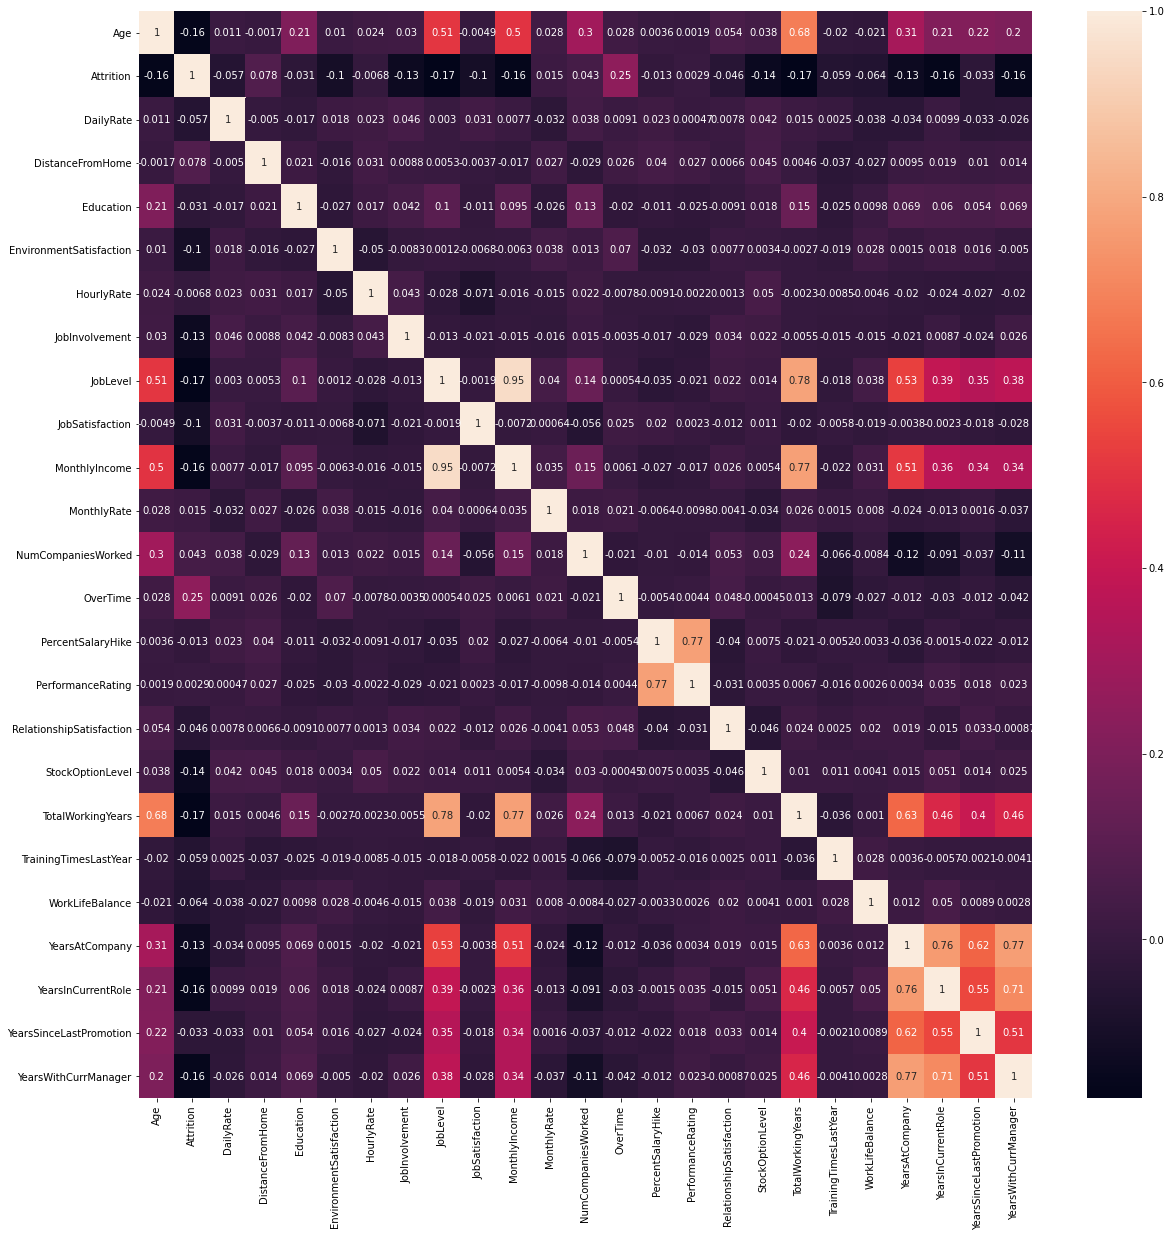

In [23]:
correlation = employee_df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,annot=True)

We find that:

* Job level is strongly correlated with total working hours

* Monthly income is strongly correlated with Job level

* Monthly income is strongly correlated with total working hours

* Age is stongly correlated with monthly income

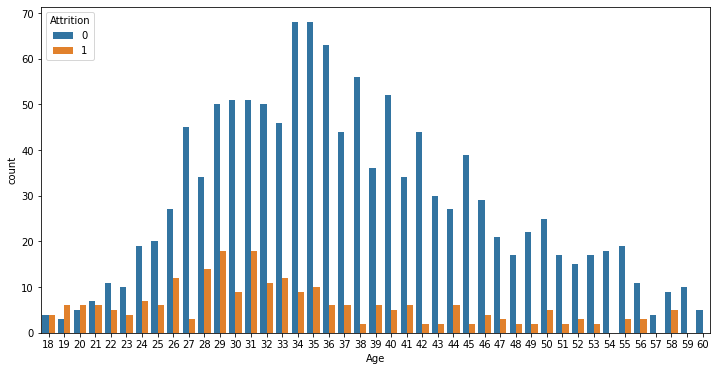

In [24]:
#plot the age and the attrition to see the relationship
plt.figure(figsize=(12,6))
sns.countplot(x='Age',hue='Attrition',data=employee_df)

The relationship between the age and the attrition is correlated and the plot above is nearly normally distributed which means that there's a higher chance that people leave after start working few years.

Without working experience and too old will influence the decision whether leave or not.From the plot,we see that no one left at 59/60 years old.



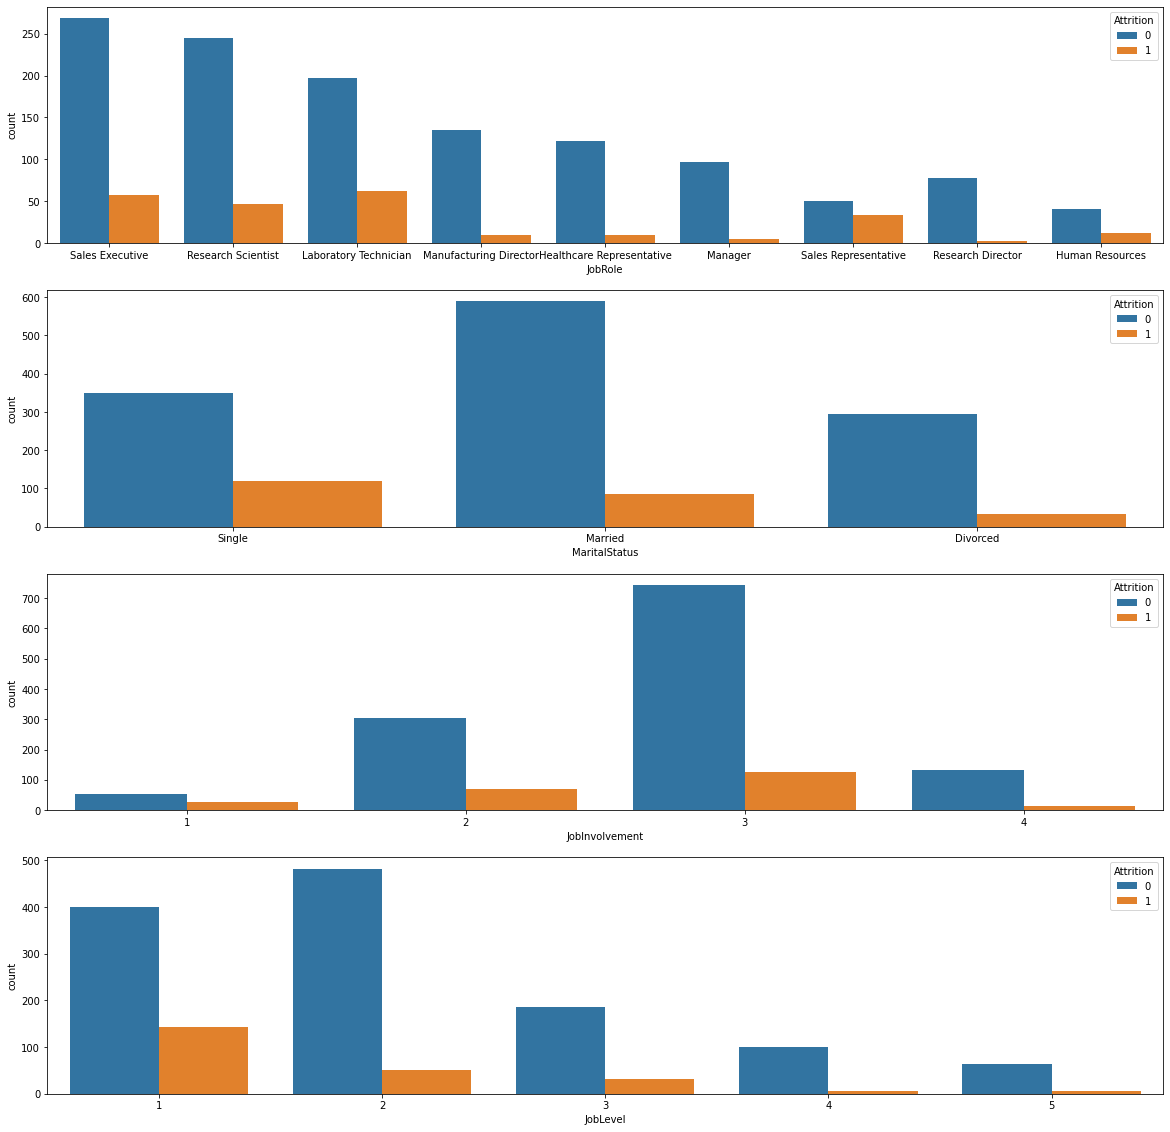

In [25]:
#job involvement and job level 
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='JobRole',hue='Attrition',data=employee_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus',hue='Attrition',data=employee_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement',hue='Attrition',data=employee_df)
plt.subplot(414)
sns.countplot(x='JobLevel',hue='Attrition',data=employee_df)


From the plots above, we find:

* Single employees tend to leave compared to married and divorced

* Sales Representitives tend to leave compared to any other job 

* Less involved employees tend to leave the company 

* Less experienced (low job level) tend to leave the company 



---



---



Use KDEplot in seaborn to visualize the Probability Density of a continuous variable. 

KDE describes the probability density at different values in a continuous variable. 

Text(0.5, 0, 'distance from home')

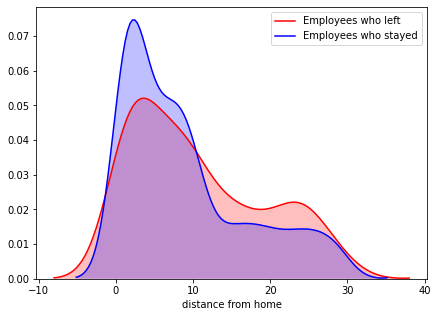

In [26]:
#First plot the kde of distance from home
plt.figure(figsize=(7,5))

sns.kdeplot(left_df['DistanceFromHome'],label = 'Employees who left',shade= True,color='red',cbar=True)
sns.kdeplot(stayed_df['DistanceFromHome'],label = 'Employees who stayed',shade= True,color='blue',cbar=True)

plt.xlabel("distance from home")

Text(0.5, 0, 'years with current manager')

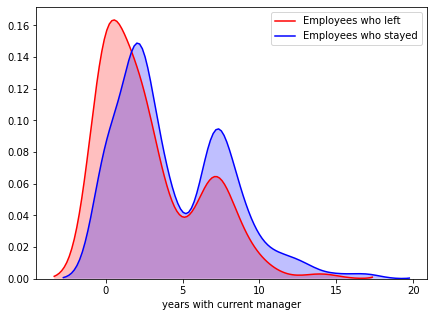

In [27]:
# plot the kde of years with current manager
plt.figure(figsize=(7,5))

sns.kdeplot(left_df['YearsWithCurrManager'],label = 'Employees who left',shade= True,color='red',cbar=True)
sns.kdeplot(stayed_df['YearsWithCurrManager'],label = 'Employees who stayed',shade= True,color='blue',cbar=True)

plt.xlabel("years with current manager")

Text(0.5, 0, 'total working years')

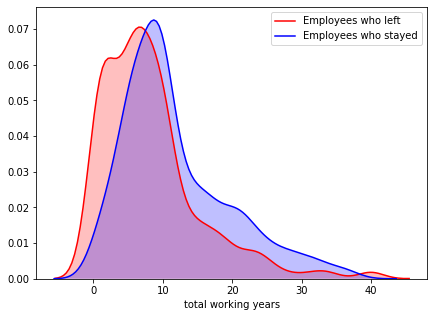

In [28]:
# plot the kde of total working years
plt.figure(figsize=(7,5))

sns.kdeplot(left_df['TotalWorkingYears'],label = 'Employees who left',shade= True,color='red',cbar=True)
sns.kdeplot(stayed_df['TotalWorkingYears'],label = 'Employees who stayed',shade= True,color='blue',cbar=True)

plt.xlabel("total working years")

It seems that before 10 years there is a big chance for employees to leave more. As you go beyond this,employees leaves less.

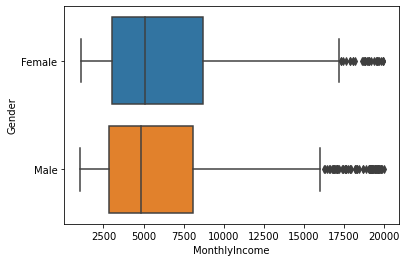

In [29]:
#plot the gender vs.monthly income
sns.boxplot(x='MonthlyIncome',y='Gender',data=employee_df)


There is not much difference between the male and the female and females actually get paid even more than males here.

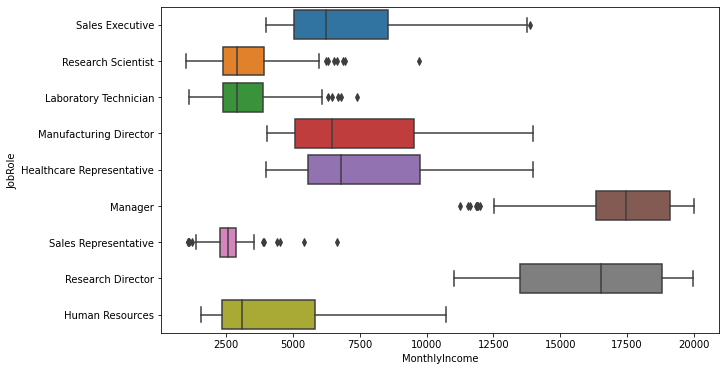

In [30]:
#plot the monthly income vs. job role
plt.figure(figsize=[10,6])
sns.boxplot(x='MonthlyIncome',y='JobRole',data=employee_df)

It seems that the manager and research director tend to get a lot more.

Also, reaserch scientist and laboratory technician and sales representative seems paid less compared to the manager and research director which make sense.


# 4.MODEL


Scaling features to a range

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x_all)
y = employee_df['Attrition']

Split the train and test data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

x_train.shape

x_test.shape

(294, 50)

## Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = model1.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print('accuracy {} %'.format(100*accuracy_score(y_pred,y_test)))

accuracy 88.09523809523809 %


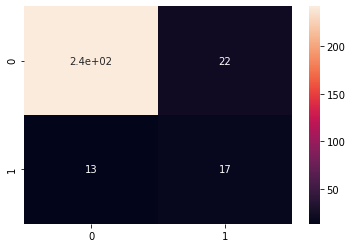

In [39]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.57      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.74      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred2 = model2.predict(x_test)

In [44]:
print('accuracy {} %'.format(100*accuracy_score(y_pred2,y_test)))

accuracy 86.39455782312925 %


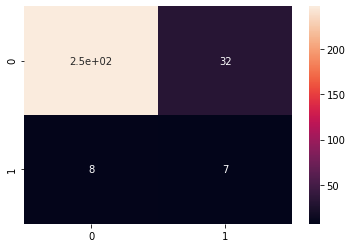

In [45]:
cm=confusion_matrix(y_pred2,y_test)
sns.heatmap(cm,annot=True)


In [46]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.47      0.18      0.26        39

    accuracy                           0.86       294
   macro avg       0.68      0.57      0.59       294
weighted avg       0.83      0.86      0.84       294



## RANDOM FOREST CLASSIFIER

In [47]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_pred3 = model3.predict(x_test)

In [49]:
print('accuracy {} %'.format(100*accuracy_score(y_pred3,y_test)))

accuracy 88.09523809523809 %


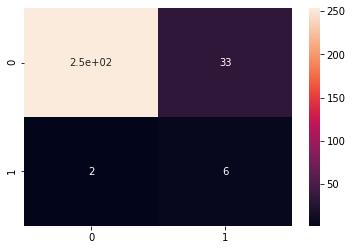

In [50]:
cm=confusion_matrix(y_pred3,y_test)
sns.heatmap(cm,annot=True)

In [51]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       255
           1       0.75      0.15      0.26        39

    accuracy                           0.88       294
   macro avg       0.82      0.57      0.60       294
weighted avg       0.87      0.88      0.85       294



## Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
model4.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
y_pred4 = model4.predict(x_test)

In [54]:
print('accuracy {} %'.format(100*accuracy_score(y_pred4,y_test)))

accuracy 86.73469387755102 %


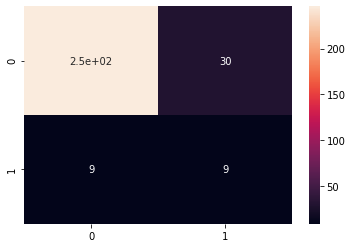

In [55]:
cm=confusion_matrix(y_pred4,y_test)
sns.heatmap(cm,annot=True)

In [56]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.50      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.70      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294



# 5.Conclusion

Four machine learning models were implemented in this release, resulting in a best prediction accuracy of 91.5% in logistic regression model.This represents that the ensemble method not necessarily perform better than simple machine learning method.


It can be observed that a decent result was produced by the neural network, when considering the small amount of data that was provided. We can also deduce that the neural network model is most probably overfitted and therefore some further adjustments are necessary. Several hyperparameter configurations were attempted for this classifier.


There is obviously room for further analysis and improvement and fine tuning of the models. Maybe future will need more atttempts to obtain a better result.